# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
pd.options.display.float_format = '{:.2f}'.format
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [5, 121, 377]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9413,8259,5126,666,1795,1451
1,4020,3234,1498,2395,264,255
2,38793,3154,2648,1034,96,1242


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.29
* Milk: 5796.2
* Grocery: 7951.2
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
1. **For establishment 0:** It shows strong preference to **"Milk"** among all observations, where we can tell its milk puchase value is **42%** higher than the average. If we look closer, we will see actually it locates at the third quantile of all data points.
2. **For establishment 1:** Based on its purchase value, either it is a small customer or a customer with low loyalty to our brand. For all product categories, its purchase values are lower than the average, even lower than most median purchase value, except for **"Frozen"** product category.
3. **For establishment 2:** It is a big buyer on **"Fresh"** product category and, just like the establishment 0, it ranks at the third quantile in the group. One thing worth mentioning, as we can tell "Fresh" product brings in the largest revenue for our brand, establishment 2 is definitely worth for our attention more.  

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
label = "Delicatessen"
new_data = data.drop(labels=label, axis=1)
y = data[label]

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.25, random_state=20)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=20)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print score

-1.32764023447


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
1. Predicting **"Delicatessen"**.
2. The reported R^2 is **-1.32**, implying it's not correlated to the remaining features.
3. With distinct feature like "Delicatessen", we can identify particular customer segment. It is always helpful to have diversified, independent features enabling us to discover implicit customer segments.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

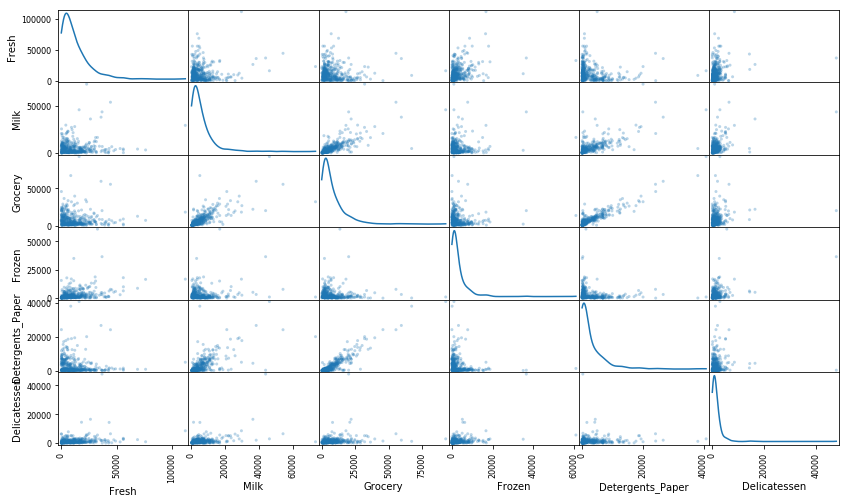

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

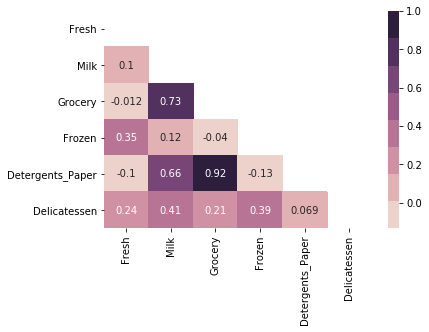

In [6]:
import seaborn as sns
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), cmap = sns.cubehelix_palette(8), annot = True, mask = mask)

**Answer:**
1. We can observe from the density curve at the diagonal line, all features are more or less **right skewed**, instead of normally distributed, implying feature transformation is in need. Partially it is caused by the outliers. For example, we take a look at scatter plot for **"Delicatessen vs Fresh"** at the top right corner. There are some points at the further top and right side of the plot. These points are typical outliers and will have great leverage to the kernel density curve, dragging it to right skewness. Such phenomena, to some extent, are common in the remaining plots.
2. Obviously, two sets of highly correlated features are worth noting, one is the correlation between **"Grocery and Detergents_Paper"(0.92)** and the other is **"Grocery and Milk"(0.73)**. Therefore understably, we can observe the mild correaltion between **"Detergents_Paper and Milk"(0.66)**.
3. For I was trying to predict **Delicatessen**, it apparently shows little correlation to all other features as being revealed in the correlation plot. In the **Delicatessen column** of scatter plot, we can tell major chunks of points are vertically distributed and seem to be incorrelated to value of other features at y axis. It also echos the outcome of R^2 calculated from the earlier decision tree regressor. 
4. Looking at the diagonal charts in the plot, all features seem quite suitable to be categorized using **Gamma Distribution** with different **shape parameter**. As Gamma Distribution is a rather general and flexible distribution for **non-negative variables**, it is also consistent to this case where the minimal spend for each product is 0.   

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

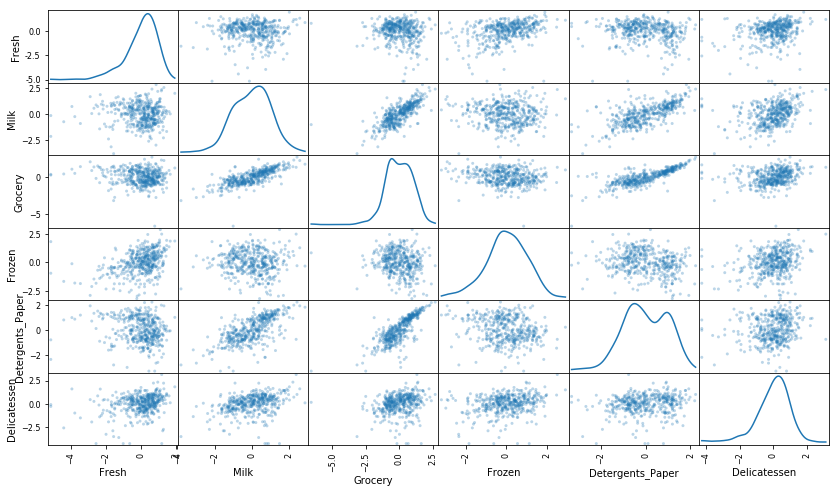

In [7]:
from sklearn.preprocessing import StandardScaler
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# with the advice from mentor, I further scales the log_data to standardized log_data
scaler = StandardScaler()
scaler.fit(log_data)
log_data_std = pd.DataFrame(scaler.transform(log_data), \
                            index = log_data.index.values, columns = log_data.columns.values) 
log_samples_std = pd.DataFrame(scaler.transform(log_samples), \
                               index = log_samples.index.values, columns = log_samples.columns.values)


# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data_std, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples_std)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.28,0.83,0.09,-0.62,0.41,0.47
1,-0.29,-0.04,-1.01,0.37,-0.70,-0.86
2,1.24,-0.06,-0.50,-0.28,-1.29,0.35


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
# For each feature find the data points with extreme high or low values
outliers_count = [] # used for collecting index of outlier, including duplicates
outliers_set = set() # taking advantage of the property of sets to collect unique index and drop out the duplicates
for feature in log_data_std.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(a = log_data_std[feature], q = 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(a = log_data_std[feature], q = 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data_std[~((log_data_std[feature] >= Q1 - step) & (log_data_std[feature] <= Q3 + step))])
    drop_index = log_data_std[~((log_data_std[feature] >= Q1 - step) & (log_data_std[feature] <= Q3 + step))].index.values
    outliers_count.extend(drop_index)

    drop_index = set(drop_index)
    outliers_set = outliers_set.union(drop_index)
    

# OPTIONAL: Select the indices for data points you wish to remove
outliers = list(outliers_set) # convert type from set to list

# Remove the outliers, if any were specified
good_data = log_data_std.drop(log_data_std.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,-2.90,1.69,2.06,-2.90,1.93,0.45
66,-4.42,-0.73,0.42,-1.67,0.79,-2.57
81,-2.26,0.96,1.02,-1.29,1.27,-1.23
95,-5.16,-0.13,0.27,-0.95,-0.80,-0.08
96,-3.78,-0.23,0.50,-1.81,0.86,-0.98
128,-2.56,0.90,-0.17,-1.83,0.11,-4.25
171,-2.32,1.89,1.30,-0.64,1.33,1.58
193,-2.39,0.03,1.32,-0.34,1.07,-0.13
218,-3.95,0.74,1.07,-0.11,0.98,1.60
304,-2.47,0.74,1.50,-0.68,1.51,0.86


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,0.89,2.86,1.74,-0.32,1.82,0.11
98,-1.70,-3.15,-1.60,-0.39,-1.61,-1.36
154,-1.55,-3.81,-3.16,-2.33,-2.82,-3.50
356,0.88,-2.98,-2.74,0.59,-2.67,-0.27


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,0.81,-1.00,-6.59,0.85,-3.31,0.17
154,-1.55,-3.81,-3.16,-2.33,-2.82,-3.50


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,-0.20,1.43,1.15,-2.97,1.20,-0.45
57,-0.09,1.00,0.73,-2.86,1.25,0.38
65,-2.90,1.69,2.06,-2.90,1.93,0.45
145,0.86,0.85,1.81,-2.78,1.54,1.32
175,-0.66,0.78,0.84,-2.61,0.91,0.59
264,-1.19,0.98,1.08,-2.49,1.11,0.36
325,1.13,1.49,0.97,2.90,0.21,1.50
420,-0.22,0.41,0.94,-3.18,1.19,0.44
429,0.22,-0.61,-0.23,-2.69,-1.37,0.89
439,-0.54,-0.63,-0.55,-2.44,-0.36,-2.07


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,0.81,-1.00,-6.59,0.85,-3.31,0.17
161,0.47,-1.69,-2.51,-0.24,-3.31,0.80


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,-4.42,-0.73,0.42,-1.67,0.79,-2.57
109,-1.00,1.48,1.64,-0.62,-0.03,-4.25
128,-2.56,0.90,-0.17,-1.83,0.11,-4.25
137,-0.47,0.81,0.52,-0.63,-0.12,-2.35
142,1.21,0.70,0.52,0.55,-2.20,-4.25
154,-1.55,-3.81,-3.16,-2.33,-2.82,-3.50
183,1.21,2.38,1.32,2.50,-0.76,3.14
184,-1.99,-1.20,0.01,-2.34,-0.57,-3.26
187,-0.63,0.80,0.67,1.12,0.79,-4.25
203,-1.60,-1.47,-0.66,-0.90,0.04,-2.88


In [10]:
# use Counter() to compute the frequency of each value
from collections import Counter
outliers_count = Counter(outliers_count)
print outliers_count
print "Total number of outliers: {}".format(len(outliers_count))

Counter({154: 3, 128: 2, 65: 2, 66: 2, 75: 2, 193: 1, 264: 1, 137: 1, 142: 1, 145: 1, 412: 1, 285: 1, 161: 1, 420: 1, 38: 1, 171: 1, 429: 1, 175: 1, 304: 1, 305: 1, 439: 1, 184: 1, 57: 1, 187: 1, 203: 1, 325: 1, 289: 1, 81: 1, 338: 1, 86: 1, 343: 1, 218: 1, 95: 1, 96: 1, 353: 1, 98: 1, 355: 1, 356: 1, 357: 1, 233: 1, 109: 1, 183: 1})
Total number of outliers: 42


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
1. Yes, actually there are **5** observations being considered outliers for multiple features.  
2. Althougth these data points may provide potential insights in analysis, I will still remove them from the dataset. Considering using K-means in following analysis, it's always preferred to have customer segment with certain amount. Putting these data points in the dataset will either strongly **pull the remaining observations away from central tendancy or come up with single observation customer segment**. None are desirable results.
3. In addition, I would prefer to **drop out any observation which has either single or multiple feature outlier** in this case, because again for the stability of clustering process.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

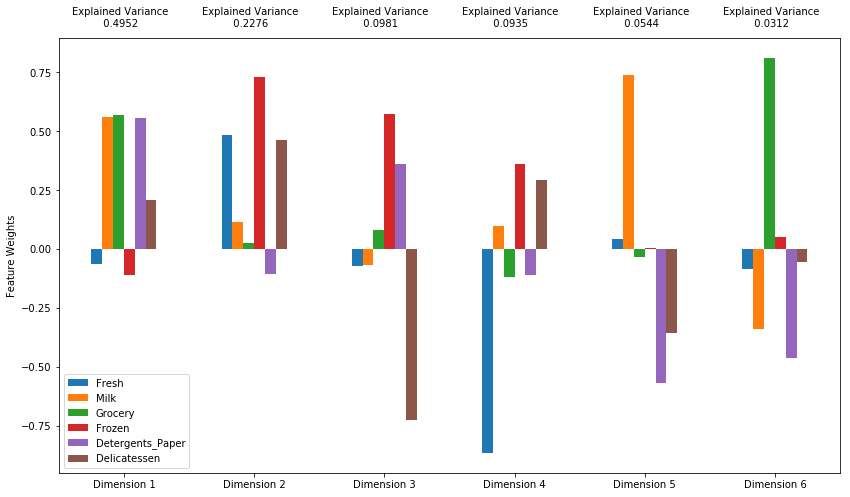

In [11]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA().fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples_std)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
1. Around **72%** of total variance is explained by the first *two* components.
2. Around **91%** of total variance is explained by the first *four* components.
3. Discussion as follows: (the loadings of the principle components represent the correlation between features and the component)
    1. The first compoenent, also being the most important one, shows a high positive correlation among **Milk, Grocery and, Detergents_Paper**. It is consistent to what we have discovered in the phase of feature relevance. In the context of customer segmentation, it may describe a kind of customer having strong or no demand on all three prodcuts.
    2. The second component shows a high positive correlation among **Fresh, Frozen and, Delicatessen**. It is somehow surprising, since I thought these products are incorrelated to any of the other products. In the context of customer segmentation, it follows the mentioned rule, discribing a kind of customer having demand on Fresh, Frozen and, Delicatessen.
    3. The third component reveals the negative correlation between **Frozen and Delicatessen**. It implies there exist a kind of customer having strong demand on Frozen while showing no need for Delicatessen or vice versa.
    4. The forth component reveals the negative correlation among **Fresh and Frozen**. Again, it suggests another branch of customer segment, who has strong demand on Fresh while has no need for Frozen, or vice versa.
    5. The fifth component shows contradictory result to the first component, as it says there exist negative correlation among **Milk and Detergents_Paper**. Nonetheless, this component is rather insignificant, I would prefer to neglect its outcome.
    6. The last component shows the strong negative correlation between **Grocery and Detergents_Paper**. Again, I will prefer to neglect it due to its small magnitude at variance explained. Possilbly the fifth and sixth components only represent a relatively small group of customer compared to other components.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [12]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.90,-0.23,-0.59,-0.26,0.25,-0.45
1,-1.18,-0.41,0.55,0.38,0.74,-0.36
2,-1.00,0.49,-0.98,-0.82,0.67,0.10


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [13]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples_std)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [14]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.90,-0.23
1,-1.18,-0.41
2,-1.00,0.49


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

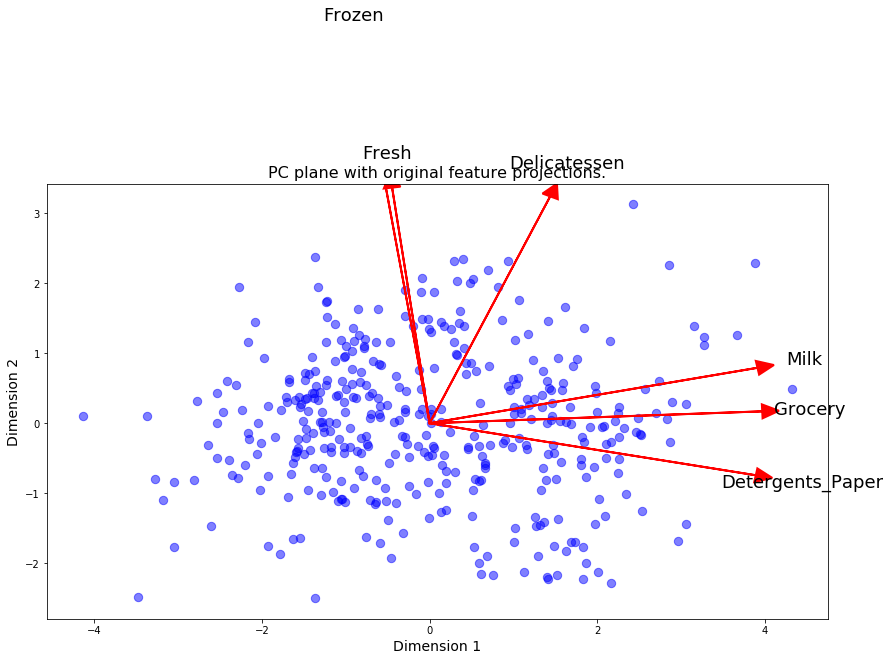

In [15]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
1. For **K-Means**, every data point is clearly assigned to **one** cluster. Much easier for interpretation and explanation to non-experts.
2. Incorporating the probability theory, **Gaussian Mixture Model** is more general to various scenarios, including the case when multiple clusters may have overlapping range in distribution, where **K-Means** isn't good at identifying the latent cluster to which data points should belong in such case.
3. I would prefer to adopt **Gaussian Mixture Model** in this analysis. As the biplot presents above, it is hard to separate different customer segment when most data points are clogged together. It seems more reasonable to view every point has certain posibility belonging to either cluster.  

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [16]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans

cluster_n = range(2,7) # loop for cluster 2 to cluster 6
clusterer = {} # use to store clsuter model
for n in cluster_n:
    clf = KMeans(n_clusters = n, random_state = 20).fit(reduced_data)
    key = "{} cluster clf".format(n)    
    clusterer[key] = clf


# TODO: Predict the cluster for each data point
preds = {} # use to store predictions for each cluster model
for key_name in clusterer.keys():
    cluster = clusterer[key_name]
    label = cluster.predict(reduced_data)
    pred_name = "{} prediction".format(key_name)
    preds[pred_name] = label


# TODO: Find the cluster centers
centers = {} # use to store centers for each cluster model
for key_name in clusterer.keys():
    center = clusterer[key_name].cluster_centers_
    center_name = "{} center".format(key_name)
    centers[center_name] = center


# TODO: Predict the cluster for each transformed sample data point
sample_preds = {} # use to store prediction of samples for each cluster model
for key_name in clusterer.keys():
    cluster = clusterer[key_name]
    sample_label = cluster.predict(pca_samples)
    pred_name = "{} prediction".format(key_name)
    sample_preds[pred_name] = sample_label


# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score

score = {} # use to store silhouette score for each cluster model
for key_name in preds.keys():
    cluster_label = preds[key_name]
    avg_score = silhouette_score(reduced_data, cluster_label)
    score_name = "{} score".format(key_name.replace(" prediction",""))
    score[score_name] = avg_score

display(score)

{'2 cluster clf score': 0.42870806233837178,
 '3 cluster clf score': 0.36538724227025338,
 '4 cluster clf score': 0.34219656660513825,
 '5 cluster clf score': 0.36367689109486889,
 '6 cluster clf score': 0.36464904650921975}

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
1. The average sihouette score for each cluster as follows:
    1. score for 2 clusters - 0.42
    2. score for 3 clusters - 0.36
    3. score for 4 clusters - 0.34
    4. score for 5 clusters - 0.36
    5. score for 6 clusters - 0.36
2. Of all, **KMeans model for 2 clusters** has the highest sihouette score, and hence I will choose it as the final model.


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

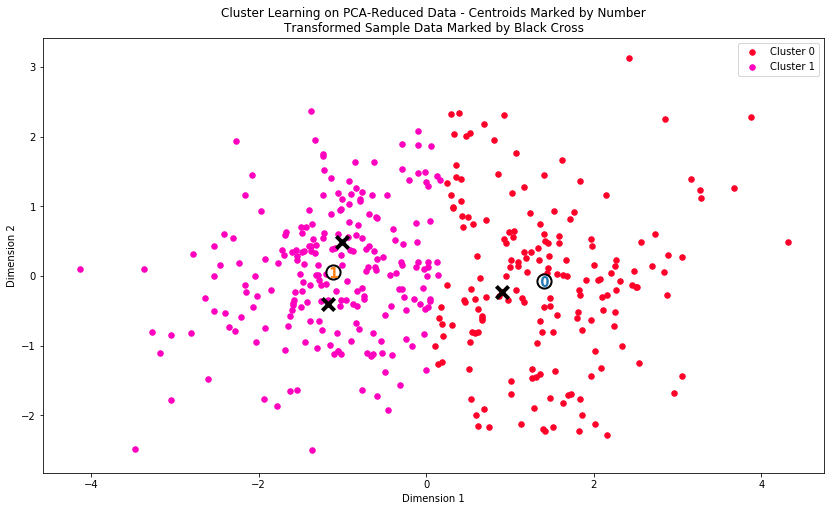

In [17]:
# Display the results of the clustering from implementation
preds_2 = preds["2 cluster clf prediction"]
centers_2 = centers["2 cluster clf center"]

vs.cluster_results(reduced_data, preds_2, centers_2, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [18]:
# TODO: Inverse transform the centers
log_centers_std = pca.inverse_transform(centers_2)

# convert from standardized to log data
log_centers = scaler.inverse_transform(log_centers_std)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers_2))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
print "cluster center of two segments"
display(true_centers)

cluster center of two segments


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,6277.00,7800.00,11012.00,1277.00,3456.00,1252.00
Segment 1,8806.00,1728.00,2241.00,2098.00,302.00,691.00


mean value for two segment


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
label,,,,,,
0,11621.96,9596.06,13550.03,2509.45,5562.98,2034.51
1,13071.74,2228.14,2712.38,3440.55,475.74,995.06


statistical summary of whole integrated dataset


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,398.00,398.00,398.00,398.00,398.00,398.00
mean,12430.63,5486.31,7504.91,3028.81,2725.38,1454.72
std,12552.70,6410.88,9263.80,3712.56,4644.02,1746.45
min,255.00,201.00,223.00,91.00,5.00,46.00
25%,4043.50,1597.25,2125.00,830.00,263.25,448.25
50%,9108.00,3611.50,4573.00,1729.50,788.00,997.50
75%,16969.00,6802.50,9762.25,3745.00,3660.50,1830.00
max,112151.00,54259.00,92780.00,35009.00,40827.00,16523.00


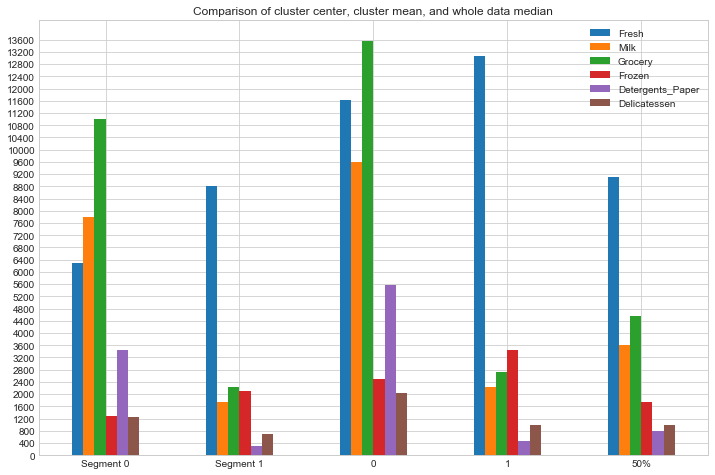

In [20]:
# compute the mean for each cluster 
prediction_label = pd.DataFrame(preds["2 cluster clf prediction"], columns=["label"]) # access the prediction label
good_data_exp = pd.DataFrame(np.exp(scaler.inverse_transform(good_data)),\
                             index=good_data.index.values, columns=good_data.columns.values)

# concatenate cluster label and original data
good_data_label = pd.concat([prediction_label, good_data_exp], axis = 1) 

print "mean value for two segment"
display(good_data_label.groupby("label").mean())

# the median for whole integrated dataset
print "statistical summary of whole integrated dataset"
display(good_data_exp.describe())

# visulize the center, mean, median for the cluster and whole dataset
combine = pd.concat([true_centers,good_data_label.groupby("label").mean()], axis = 0) 

# join the median of all dataset
combine = combine.append(good_data_exp.describe().loc["50%"]) 

# visualize them
sns.set_style("whitegrid")
combine.plot(kind="bar", figsize=(12,8), \
             yticks=np.arange(0,combine.values.max()+400,400), \
             rot = 0, \
            title="Comparison of cluster center, cluster mean, and whole data median")

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

1. Firstly, focusing on **segment 0**, it shows the customer segment mainly buys **Milk, Grocery, Detergents_Paper, and Delicatessen**. For there are some influential observations(strong buyers) in the dataset, it's better if we compare **the center value** of segment 0 to **the median value** of all dataset, we can tell the center value of Milk, Grocery, Detergents_Paper and Delicatessen in segment 0 are higher than the median value of all dataset. **In the first guess, this segment may represent customers from supermarket**.
2. Accordingly, for **segment 1**, it clearly shows the customer segment mainly buys **Fresh and Frozen** products. The center values are close to or higher than the median in all dataset. **This segment may represent customers from restaurants**.
3. As a side note, if we compare the mean of segment 0 to the mean of all dataset, it also confirms segment 0 is extremely inclined to Milk, Grocery, Detergents_Paper and Delicatessen products.
4. Similarly, the mean values of segment 1 in Fresh and Frozen are both higher than the average.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [21]:
# Display the predictions
for i, pred in enumerate(sample_preds["2 cluster clf prediction"]):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


In [23]:
print "raw data of samples"
display(samples) # sample original data
print "center for two clusters"
display(true_centers) # display cluster center for comparison

raw data of samples


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9413,8259,5126,666,1795,1451
1,4020,3234,1498,2395,264,255
2,38793,3154,2648,1034,96,1242


center for two clusters


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,6277.00,7800.00,11012.00,1277.00,3456.00,1252.00
Segment 1,8806.00,1728.00,2241.00,2098.00,302.00,691.00


**Answer:**
1. Two out of all samples are labeled as segment 1, and one is labeled as segment 0.
2. Though there are minor inconsistences for specific feature in the samples, for example, the Fresh spending for sample 1 is smaller than the spending in sample 0 (where it's supposed to be a big buyer), but on the other hand, it however shows the strongest demand on Frozen at the same time, kind of balancing out the result, so overall speaking, the samples follow pretty closely the pattern for each segment. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
1. Using A/B testing allows us to measure the **before/after effect** of the new proposal. When combining techniques of clustering and A/B testing, we could discover more deep and sophisticated insights among different customer segments.
2. The practice as follows:
    1. We need to decide the significance level of effect we want to observe for the new proposal at first, so that we can evaluate the amount of samples needed.
    2. In order to measure how different customer segment responds to the proposal, we need to split the cluster into two group for every segment, one for the control group and the other for the experimental group, thus the A/B testing.
    3. By implementing A/B testing on every cluster, we could then collect the feedback and the significance level for the effect.
    4. Using the experiment result as guideline for future deployment on the most suitable customer segment.
2. If my speculation on the type of customer in segment 0 and 1 is correct, saying **supermarkets and restaurants**. Then, I would say the change of delivery scheme will negatively affect the restaurants for they always expect the freshest food being delivered. On the other hand, the change will not strongly affect the operations for supermarkets, for they are tend to buy in large amount of products, and have less frquency than restaurants do. So, if the change of delivery scheme means less expenses for supermarket, then I would say they will favor the option instead.
3. Hence, the A/B testing could help confirm the hypothesis for us. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
1. Since we have PCA and the cluster model at hand, we can apply PCA on the new customers and subsequently apply the cluster model to the transformed dimensions of these customers. This is how we can label them and respond with according strategy.  

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

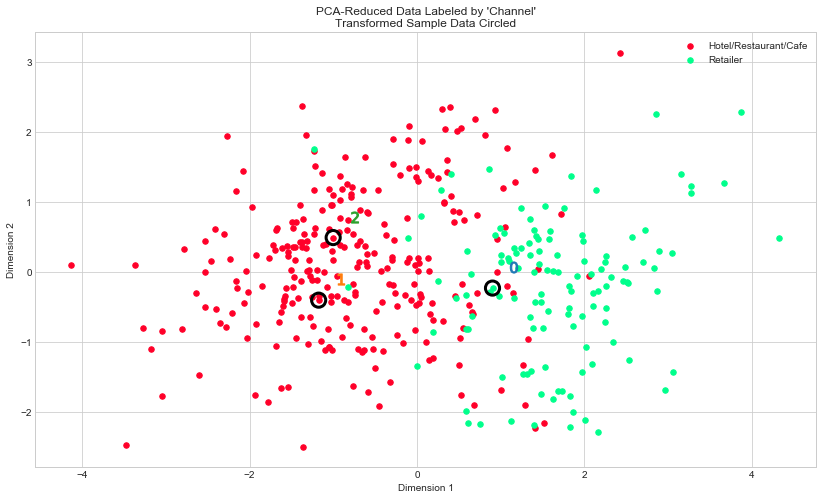

In [24]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
1. The clustering algorithm seems to have done a good job on identifying the big picture of the customer distribution. We see the graph above echos what the plot of cluster result draws with a hidden line splitting the two.
2. As the data points locate further away in either sides, left or right, their probability of belonging one certain segemnt nearly increases to 1.
3. I would say it is almost consistent to my guess. I was betting the segment 1 is **restaurant** and the segment 0 is **supermarket**, while in reality, the segment 1 is **Hotel/Restaurant/Cafe** and the segment 0 is **Retailer**. Pretty much the same.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.